In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import json

In [2]:
TRAIN_PATH = './dota2Dataset/dota2Train.csv'
NAME_PATH = './dota2Dataset/heroes.json'
TEST_PATH = './dota2Dataset/dota2Test.csv'
BINARY_PATH_TRAIN = './dota2Dataset/dota2Train.pkl'
BINARY_PATH_TEST = './dota2Dataset/dota2Test.pkl'

In [3]:
names = ['label', 'cluster-id', 'game-mode', 'game-type']
with open(NAME_PATH, "r") as read_file:
    data = json.load(read_file)
    for entry in data['heroes']:
        names.append(entry['name'])


In [4]:
df = pd.read_csv(TRAIN_PATH, header=None, index_col=False, names=names)
df_test = pd.read_csv(TEST_PATH, header=None, index_col=False, names=names)

In [5]:
print(df.columns)

Index(['label', 'cluster-id', 'game-mode', 'game-type', 'antimage', 'axe',
       'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger',
       ...
       'legion_commander', 'ember_spirit', 'earth_spirit', 'abyssal_underlord',
       'terrorblade', 'phoenix', 'techies', 'oracle', 'winter_wyvern',
       'arc_warden'],
      dtype='object', length=116)


In [6]:
print(df.describe())

              label    cluster-id     game-mode     game-type      antimage  \
count  92650.000000  92650.000000  92650.000000  92650.000000  92650.000000   
mean       0.053038    175.864145      3.317572      2.384587     -0.001630   
std        0.998598     35.658214      2.633070      0.486833      0.402004   
min       -1.000000    111.000000      1.000000      1.000000     -1.000000   
25%       -1.000000    152.000000      2.000000      2.000000      0.000000   
50%        1.000000    156.000000      2.000000      2.000000      0.000000   
75%        1.000000    223.000000      2.000000      3.000000      0.000000   
max        1.000000    261.000000      9.000000      3.000000      1.000000   

                axe          bane   bloodseeker  crystal_maiden   drow_ranger  \
count  92650.000000  92650.000000  92650.000000    92650.000000  92650.000000   
mean      -0.000971      0.000691     -0.000799       -0.002008      0.003173   
std        0.467672      0.165052      0.3553

In [7]:
print(df.dtypes)

label                  int64
cluster-id             int64
game-mode              int64
game-type              int64
antimage               int64
axe                    int64
bane                   int64
bloodseeker            int64
crystal_maiden         int64
drow_ranger            int64
earthshaker            int64
juggernaut             int64
mirana                 int64
nevermore              int64
morphling              int64
phantom_lancer         int64
puck                   int64
pudge                  int64
razor                  int64
sand_king              int64
storm_spirit           int64
sven                   int64
tiny                   int64
vengefulspirit         int64
windrunner             int64
zuus                   int64
kunkka                 int64
lina                   int64
lich                   int64
lion                   int64
                       ...  
ogre_magi              int64
undying                int64
rubick                 int64
disruptor     

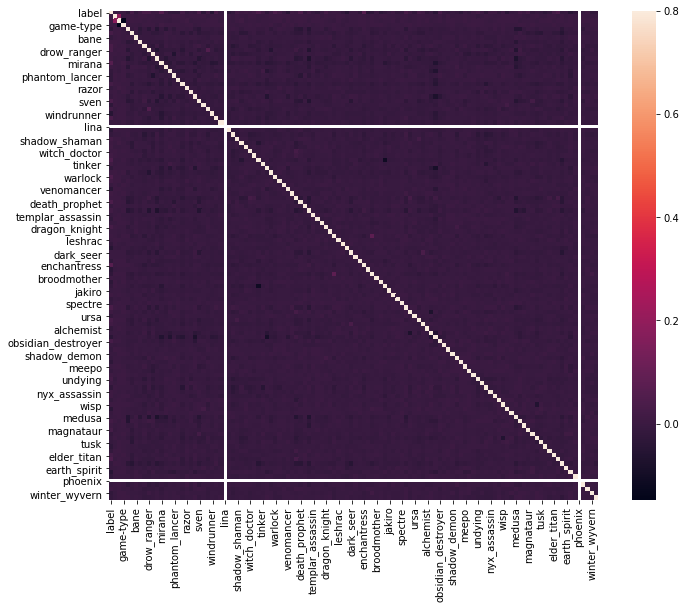

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [9]:
print(df.head())

   label  cluster-id  game-mode  game-type  antimage  axe  bane  bloodseeker  \
0     -1         223          2          2         0    0     0            0   
1      1         152          2          2         0    0     0            1   
2      1         131          2          2         0    0     0            1   
3      1         154          2          2         0    0     0            0   
4     -1         171          2          3         0    0     0            0   

   crystal_maiden  drow_ranger     ...      legion_commander  ember_spirit  \
0               0            0     ...                     0             0   
1               0           -1     ...                     0             0   
2               0           -1     ...                     0             0   
3               0            0     ...                     0            -1   
4               0           -1     ...                     0             0   

   earth_spirit  abyssal_underlord  terrorblade  p

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head())
print('Any missing: {}'.format((total > 0).sum()))

               Total  Percent
arc_warden         0      0.0
venomancer         0      0.0
shadow_shaman      0      0.0
slardar            0      0.0
tidehunter         0      0.0
Any missing: 0


In [11]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head())
print('Any missing: {}'.format((total > 0).sum()))

               Total  Percent
arc_warden         0      0.0
venomancer         0      0.0
shadow_shaman      0      0.0
slardar            0      0.0
tidehunter         0      0.0
Any missing: 0


In [12]:
print(df.iloc[:, 0].unique())
print(df_test.iloc[:, 0].unique())

[-1  1]
[-1  1]


(10294, 116)


In [13]:
df.to_pickle(BINARY_PATH_TRAIN)
df_test.to_pickle(BINARY_PATH_TEST)